<a href="https://colab.research.google.com/github/SyarifulMsth/CuBiDaSa/blob/main/Notebook/DSA_Compfest_2023_Banjir_Prov_DKI_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Academy (DSA) COMPFEST 2023 🚀

Team : CUBIDASA

Anggota :  
1.   Reza Arifin Sori Harahap
2.   Syariful Musthofa
3.   Yogi Ferdana Gajah



# Importing the necessary libraries

In [1]:
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import time, copy, argparse
import multiprocessing
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style


import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

# Mount to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Study case : Banjir
Source [Data Rekapitulasi Tahunan Kejadian Banjir di Provinsi DKI Jakarta](https://data.jakarta.go.id/dataset/rekapitulasi-kejadian-banjir-pertahun)


## **Analisis Korelasi Frekuensi Banjir dengan Ketersediaan Fasilitas Pengungsian di DKI Jakarta**
## Problem Statement :
1.   Bagaimana penyebaran banjir di Provinsi DKI Jakarta? Apakah meningkat atau menurun setiap tahunnya?
2.   Pada tahun berapa banjir terjadi dengan frekuensi terbanyak di DKI Jakarta?
3. Pada tahun berapa jumlah korban jiwa terbanyak akibat banjir terjadi di DKI Jakarta?
4. Berapa jumlah penduduk (jiwa) yang terdampak akibat banjir di DKI Jakarta tiap Tahunnya
5. Berapa jumlah korban meninggal akibat banjir di DKI Jakarta tiap tahunnya?
6. Berapa jumlah korban hilang akibat banjir di DKI Jakarta tiap tahunnya?
7. Berapa jumlah korban luka ringan akibat banjir di DKI Jakarta tiap tahunnya?
8. Berapa jumlah korban luka berat akibat banjir di DKI Jakarta tiap tahunnya?
9. Apakah ketersediaan tempat pengungsian untuk korban banjir mencukupi ?

## Find the current working directory

In [3]:
!pwd

/content


In [4]:
%cd /content/drive/My Drive/DSA/banjir_dataset/
!ls

/content/drive/My Drive/DSA/banjir_dataset
banjir_2013.csv  banjir_2016.csv  banjir_2019.csv
banjir_2014.csv  banjir_2017.csv  banjir_2020.csv
banjir_2015.csv  banjir_2018.csv  januari_2020.csv


## Load datasets & exploratory data analysis

In [5]:
base_path = '/content/drive/My Drive/DSA/banjir_dataset/'

In [6]:
# Read datasets
def read_datasets(filenames):
    datasets = {}
    for filename in filenames:
        dataset_name = filename.split(".")[0]  # Mengambil nama dataset dari nama file
        dataset = pd.read_csv(filename)
        datasets[dataset_name] = dataset
    return datasets

filenames = ["banjir_2013.csv", "banjir_2014.csv", "banjir_2015.csv", "banjir_2016.csv", "banjir_2017.csv", "banjir_2018.csv", "banjir_2019.csv", "banjir_2020.csv"]
datasets = read_datasets(filenames)

In [7]:
def print_dataset_head(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Dataset: {dataset_name}")
        print(dataset.head())
        print('\n')

print_dataset_head(datasets)

Dataset: banjir_2013
   bulan  kecamatan  kelurahan rata_rata_ketinggian_air  lama_genangan  \
0      1       35.0      124.0               10 - 400             15.0   
1      2       15.0       34.0               10 - 175              8.0   
2      3        5.0        9.0               10 - 250              2.0   
3      4       10.0       16.0               10 - 100              4.0   
4      5       10.0       16.0                0 - 160              3.0   

   rw_terdampak  kk_terdampak  jiwa_terdampak  korban_meninggal  \
0        2414.0      506164.0       1226487.0              38.0   
1         207.0       19177.0         46865.0               0.0   
2          68.0        9215.0         27020.0               0.0   
3          66.0        6004.0         15060.0               0.0   
4         139.0        4740.0         18481.0               0.0   

   korban_hilang  korban_luka_berat  korban_luka_ringan  \
0            0.0                0.0                 0.0   
1            

In [8]:
# Melihat shape dari setiap dataset
def print_dataset_shape(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Shape dataset {dataset_name} : {dataset.shape} ")

datasets = read_datasets(filenames)
print_dataset_shape(datasets)

Shape dataset banjir_2013 : (12, 15) 
Shape dataset banjir_2014 : (12, 15) 
Shape dataset banjir_2015 : (12, 15) 
Shape dataset banjir_2016 : (11, 15) 
Shape dataset banjir_2017 : (12, 15) 
Shape dataset banjir_2018 : (12, 15) 
Shape dataset banjir_2019 : (12, 15) 
Shape dataset banjir_2020 : (12, 15) 


In [9]:
# Melihat missing value dari setiap dataset
def print_missing_values(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Dataset: {dataset_name}")
        missing_values = dataset.isnull().sum()
        if missing_values.sum() == 0:
            print(f"Tidak terdapat missing value pada dataset {dataset_name}.\n")
        else:
            print(missing_values)

print_missing_values(datasets)

Dataset: banjir_2013
bulan                              0
kecamatan                          1
kelurahan                          1
rata_rata_ketinggian_air           1
lama_genangan                      1
rw_terdampak                       1
kk_terdampak                       1
jiwa_terdampak                     1
korban_meninggal                   1
korban_hilang                      1
korban_luka_berat                  1
korban_luka_ringan                 1
jumlah_jiwa_pengungsi_tertinggi    2
jumlah_tempat_pengungsian          1
jumlah_nilai_kerugian              0
dtype: int64
Dataset: banjir_2014
bulan                              0
kecamatan                          2
kelurahan                          2
rata_rata_ketinggian_air           2
lama_genangan                      2
rw_terdampak                       2
kk_terdampak                       2
jiwa_terdampak                     2
korban_meninggal                   2
korban_hilang                      2
korban_luka_berat   

In [10]:
# Drop missing values dari setiap datasets
def drop_missing_values(datasets):
    for dataset_name, dataset in datasets.items():
        dataset.dropna(inplace=True)
        print(f"Missing value dihapus dari dataset {dataset_name}.")
        print(f"Shape dataset {dataset_name} setelah menghapus missing value: {dataset.shape}\n")

my_datasets = drop_missing_values(datasets)

Missing value dihapus dari dataset banjir_2013.
Shape dataset banjir_2013 setelah menghapus missing value: (10, 15)

Missing value dihapus dari dataset banjir_2014.
Shape dataset banjir_2014 setelah menghapus missing value: (10, 15)

Missing value dihapus dari dataset banjir_2015.
Shape dataset banjir_2015 setelah menghapus missing value: (12, 15)

Missing value dihapus dari dataset banjir_2016.
Shape dataset banjir_2016 setelah menghapus missing value: (11, 15)

Missing value dihapus dari dataset banjir_2017.
Shape dataset banjir_2017 setelah menghapus missing value: (12, 15)

Missing value dihapus dari dataset banjir_2018.
Shape dataset banjir_2018 setelah menghapus missing value: (12, 15)

Missing value dihapus dari dataset banjir_2019.
Shape dataset banjir_2019 setelah menghapus missing value: (12, 15)

Missing value dihapus dari dataset banjir_2020.
Shape dataset banjir_2020 setelah menghapus missing value: (12, 15)



## Tren Banjir di Provinsi DKI Jakarta berdasarkan Kecamatan dari tahun 2013-2020

In [11]:
# Menampilkan 6 baris pertama pada setiap dataframe
def print_dataset_columns(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Dataset: {dataset_name}")
        if 'bulan' in dataset.columns and 'kecamatan' in dataset.columns:
            print(dataset[['bulan', 'kecamatan']].head(6))
        else:
            print("Kolom 'bulan' atau 'kecamatan' tidak ada dalam dataset.")
        print('\n')

print_dataset_columns(datasets)

Dataset: banjir_2013
   bulan  kecamatan
0      1       35.0
1      2       15.0
2      3        5.0
3      4       10.0
4      5       10.0
6      7        6.0


Dataset: banjir_2014
   bulan  kecamatan
0      1       37.0
1      2       21.0
2      3        8.0
3      4        3.0
4      5        2.0
5      6        1.0


Dataset: banjir_2015
   bulan  kecamatan
0      1         15
1      2         38
2      3         12
3      4          4
4      5          1
5      6          0


Dataset: banjir_2016
   bulan  kecamatan
0      1          8
1      2         25
2      3         14
3      4         18
4      5         10
5      6         11


Dataset: banjir_2017
   bulan  kecamatan
0      1          4
1      2         31
2      3         20
3      4         19
4      5         15
5      6          4


Dataset: banjir_2018
   bulan  kecamatan
0      1          5
1      2         24
2      3          6
3      4          6
4      5          8
5      6          5


Dataset: banjir_2019
 

In [12]:
# Menjumlahkan banjir berdasarkan kecamatan setiap tahunnya dari tahun 2013-2020
def sum_column(datasets, column_name):
    totals = {}
    for dataset_name, dataset in datasets.items():
        dataset_name_cleaned = dataset_name.replace('banjir_', '')
        if column_name in dataset.columns:
            total = dataset[column_name].sum()
            totals[dataset_name_cleaned] = total

    # Mengurutkan hasil berdasarkan jumlah banjir dari terbesar ke terkecil
    sorted_totals = sorted(totals.items(), key=lambda x: x[1], reverse=True)
    for dataset_name, total in sorted_totals:
        print(f"Jumlah {column_name} yang mengalami banjir pada tahun {dataset_name} di Provinsi DKI Jakarta : {total}")

sum_column(datasets, 'kecamatan')

Jumlah kecamatan yang mengalami banjir pada tahun 2020 di Provinsi DKI Jakarta : 223
Jumlah kecamatan yang mengalami banjir pada tahun 2016 di Provinsi DKI Jakarta : 156
Jumlah kecamatan yang mengalami banjir pada tahun 2017 di Provinsi DKI Jakarta : 149
Jumlah kecamatan yang mengalami banjir pada tahun 2013 di Provinsi DKI Jakarta : 113.0
Jumlah kecamatan yang mengalami banjir pada tahun 2014 di Provinsi DKI Jakarta : 107.0
Jumlah kecamatan yang mengalami banjir pada tahun 2019 di Provinsi DKI Jakarta : 90
Jumlah kecamatan yang mengalami banjir pada tahun 2015 di Provinsi DKI Jakarta : 89
Jumlah kecamatan yang mengalami banjir pada tahun 2018 di Provinsi DKI Jakarta : 83


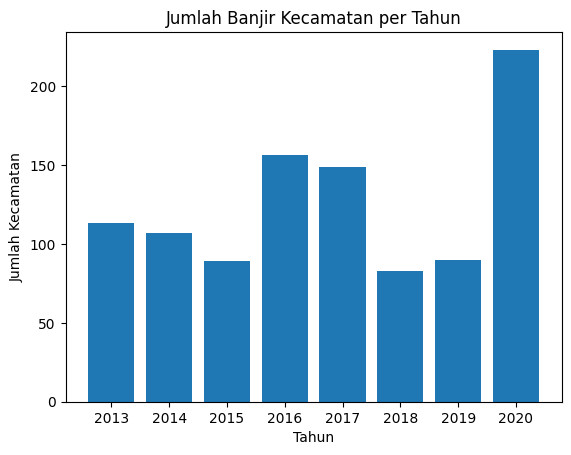

In [13]:
def visualize_floods_by_year(datasets):
    tahun = {}
    for dataset_name, dataset in datasets.items():
        dataset_name_cleaned = dataset_name.replace('banjir_', '')  # Hilangkan kata 'banjir_' pada nama dataset
        year = int(dataset_name_cleaned)
        if 'kecamatan' in dataset.columns:
            total = dataset['kecamatan'].sum()
            if year in tahun:
                tahun[year] += total
            else:
                tahun[year] = total

    years = list(tahun.keys())
    floods = list(tahun.values())

    plt.bar(years, floods)
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kecamatan')
    plt.title('Jumlah Banjir Kecamatan per Tahun')
    plt.show()

visualize_floods_by_year(datasets)

## Jumlah Korban akibat banjir di Provinsi DKI Jakarta dari tahun 2013-2020

In [14]:
# Melihat shape dari setiap dataset
def print_dataset_shape(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Shape dataset {dataset_name} : {dataset.shape} ")

datasets = read_datasets(filenames)
print_dataset_shape(datasets)

Shape dataset banjir_2013 : (12, 15) 
Shape dataset banjir_2014 : (12, 15) 
Shape dataset banjir_2015 : (12, 15) 
Shape dataset banjir_2016 : (11, 15) 
Shape dataset banjir_2017 : (12, 15) 
Shape dataset banjir_2018 : (12, 15) 
Shape dataset banjir_2019 : (12, 15) 
Shape dataset banjir_2020 : (12, 15) 


In [15]:
# Melihat missing value dari setiap dataset
def print_missing_values(datasets):
    for dataset_name, dataset in datasets.items():
        missing_values = dataset.isnull().sum()
        if missing_values.sum() == 0:
            print(f"Tidak terdapat missing value pada dataset {dataset_name}.")
        else:
            print(missing_values)

print_missing_values(datasets)

bulan                              0
kecamatan                          1
kelurahan                          1
rata_rata_ketinggian_air           1
lama_genangan                      1
rw_terdampak                       1
kk_terdampak                       1
jiwa_terdampak                     1
korban_meninggal                   1
korban_hilang                      1
korban_luka_berat                  1
korban_luka_ringan                 1
jumlah_jiwa_pengungsi_tertinggi    2
jumlah_tempat_pengungsian          1
jumlah_nilai_kerugian              0
dtype: int64
bulan                              0
kecamatan                          2
kelurahan                          2
rata_rata_ketinggian_air           2
lama_genangan                      2
rw_terdampak                       2
kk_terdampak                       2
jiwa_terdampak                     2
korban_meninggal                   2
korban_hilang                      2
korban_luka_berat                  2
korban_luka_ringan       

In [16]:
# Menampilkan 6 baris pertama pada setiap dataframe
def print_dataset_columns(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Dataset: {dataset_name}")
        if 'korban_meninggal' in dataset.columns and 'korban_hilang' in dataset.columns:
            print(dataset[['korban_meninggal', 'korban_hilang']].head(6))
        else:
            print("Kolom 'korban_meninggal' atau 'korban_hilang' tidak ada dalam dataset.")
        print('\n')

print_dataset_columns(datasets)

Dataset: banjir_2013
   korban_meninggal  korban_hilang
0              38.0            0.0
1               0.0            0.0
2               0.0            0.0
3               0.0            0.0
4               0.0            0.0
5               0.0            0.0


Dataset: banjir_2014
   korban_meninggal  korban_hilang
0              23.0            0.0
1               0.0            0.0
2               0.0            0.0
3               0.0            0.0
4               0.0            0.0
5               0.0            0.0


Dataset: banjir_2015
   korban_meninggal  korban_hilang
0                 0              0
1                 5              0
2                 0              0
3                 0              0
4                 0              0
5                 0              0


Dataset: banjir_2016
   korban_meninggal  korban_hilang
0                 0              0
1                 0              0
2                 0              0
3                 0              0


In [18]:
def count_victims(datasets):
    for dataset_name, dataset in datasets.items():
        dataset_name_output = dataset_name.replace("banjir_", "")  # Remove 'banjir_' from dataset name
        print(f"Tahun {dataset_name_output}")
        if 'korban_meninggal' in dataset.columns and 'korban_hilang' in dataset.columns:
            total_meninggal = dataset['korban_meninggal'].sum()
            total_hilang = dataset['korban_hilang'].sum()
            print(f"Total korban meninggal \t: {total_meninggal} korban jiwa")
            print(f"Total korban hilang \t: {total_hilang} orang\n")
        else:
            print("Kolom 'korban_meninggal' atau 'korban_hilang' tidak ada dalam dataset.")

count_victims(datasets)

Tahun 2013
Total korban meninggal 	: 40.0 korban jiwa
Total korban hilang 	: 0.0 orang

Tahun 2014
Total korban meninggal 	: 23.0 korban jiwa
Total korban hilang 	: 0.0 orang

Tahun 2015
Total korban meninggal 	: 5 korban jiwa
Total korban hilang 	: 0 orang

Tahun 2016
Total korban meninggal 	: 2 korban jiwa
Total korban hilang 	: 0 orang

Tahun 2017
Total korban meninggal 	: 6 korban jiwa
Total korban hilang 	: 0 orang

Tahun 2018
Total korban meninggal 	: 1 korban jiwa
Total korban hilang 	: 0 orang

Tahun 2019
Total korban meninggal 	: 2 korban jiwa
Total korban hilang 	: 0 orang

Tahun 2020
Total korban meninggal 	: 25 korban jiwa
Total korban hilang 	: 0 orang



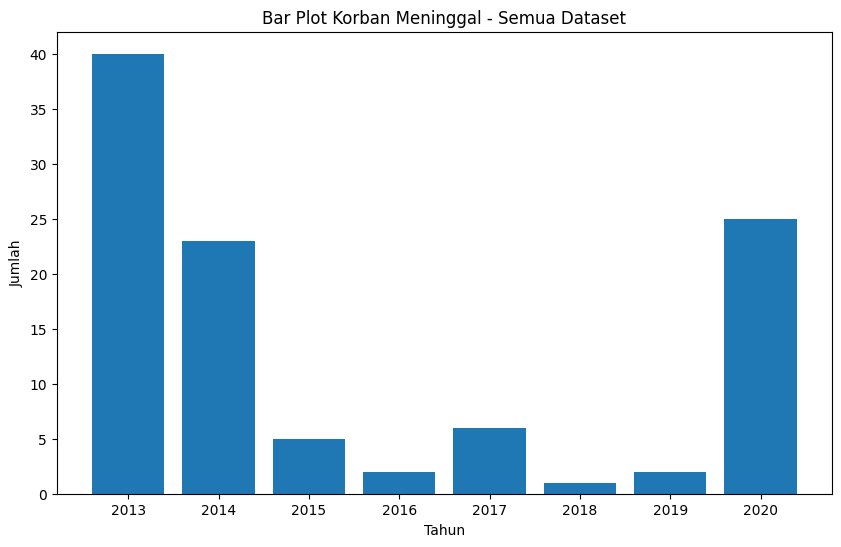

In [19]:
def plot_meninggal(datasets):
    total_meninggal = []
    dataset_names = []

    for dataset_name, dataset in datasets.items():
        dataset_names.append(dataset_name.replace("banjir_", ""))  # Remove 'banjir_' from dataset name

        if 'korban_meninggal' in dataset.columns:
            dataset['korban_meninggal'] = dataset['korban_meninggal']  # Convert 'korban_meninggal' column to integer data type

            total_meninggal.append(dataset['korban_meninggal'].sum())
        else:
            total_meninggal.append(0)

    plt.figure(figsize=(10, 6))
    x = range(len(dataset_names))

    plt.bar(x, total_meninggal)

    plt.xlabel('Tahun')
    plt.ylabel('Jumlah')
    plt.title('Bar Plot Korban Meninggal - Semua Dataset')
    plt.xticks(x, dataset_names)
    plt.show()

plot_meninggal(datasets)